In [1]:
import numpy as np
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#dropping irrelevant columns
df=df.drop(['deck', 'embark_town', 'alive', 'who', 'class', 'adult_male'], axis=1)

In [7]:
#drop rows with missing/null values
df=df.dropna()

In [8]:
#convert categoriacal variables to numeric
df['sex']=df['sex'].map({'male':0,'female':1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['alone'] = df['alone'].astype(int)

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,1


In [10]:
#DEFINE FEATURE AND TARGET VARIABLES

In [11]:
X=df.drop('survived',axis=1)
y=df['survived']

In [12]:
#TRAIN-TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#TRAIN LOGISTIC-REGRESSION MODEL

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
model=LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
#PREDICTION AND EVALUATION

In [19]:
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:",classification_report(y_test,y_pred))

Accuracy: 0.7832167832167832
Classification report:               precision    recall  f1-score   support

           0       0.77      0.88      0.82        80
           1       0.81      0.67      0.73        63

    accuracy                           0.78       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143



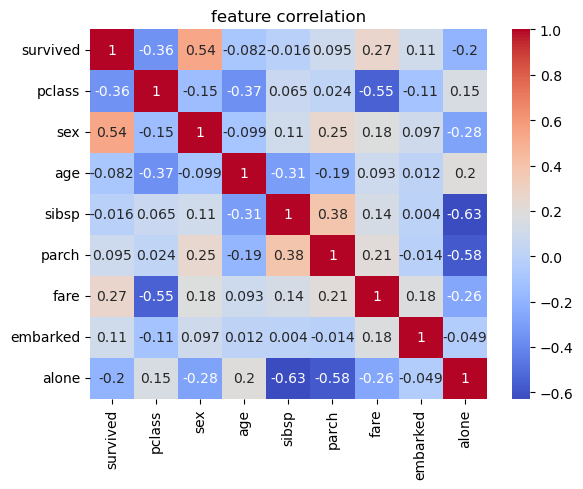

In [20]:
#VISUALIZATION FOR BETTER UNDERSTANDING
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("feature correlation")
plt.show()